In [66]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from country_cleaner import country_cleaner




ImportError: cannot import name 'country_cleaner' from 'country_cleaner' (C:\Users\bruno.goncalves\COVID-19\country_cleaner.py)

In [64]:

# Caso vc tenha criado um CSV com os dados deixar READ_URL em True 
READ_URL = True

# Comeca com o número mínimo de casos p/ contabilizar
MIN_CASES = 100

# Maximo de dias para atingir mínimo de casos - caso não atinja o número mínimo de casos eu excluo
MAX_DAYS = 40

#CHOOSE_PLOT = 'mortes'
CHOOSE_PLOT = 'casos confirmados'

# URL do John Hopkins
if CHOOSE_PLOT == 'casos confirmados':
    data_loc = ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/'
                'master/csse_covid_19_data/csse_covid_19_time_series/'
                'time_series_covid19_confirmed_global.csv')
    FILE_ADRESS = 'covid-19-cases.csv'
elif CHOOSE_PLOT == 'mortes':
    data_loc = ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/'
                'master/csse_covid_19_data/csse_covid_19_time_series/'
                'time_series_covid19_deaths_global.csv')
    FILE_ADRESS = 'covid-19-deaths.csv'

# Dodos no Dataframe
if not READ_URL:
    data_loc = FILE_ADRESS

df = pd.read_csv(data_loc)
df.rename(columns={'Country/Region': 'Country'}, inplace=True)

# Ler os arquivos de população como uma série
populations = pd.read_csv('country_populations.csv', index_col='Country',
                          squeeze=True)

# Group by por país
grp = df.groupby('Country')
df2 = grp.sum()
df2.rename(index=country_aliases, inplace=True)


def plot_graf(country):


    #Série correspondente ao país escolhido
    country_df = df2.loc[country, df2.columns[3:]].astype(int)
    #Definir o index como um Datetime - Senão o eixo das abscissas fica tosco
    country_df.index = pd.to_datetime(country_df.index)
    # Descarta linhas nates do enésimo caso
    country_df = country_df[country_df >= MIN_CASES]
    n = len(country_df)
    if n == 0:
        print('Poucos dados para plot: número mínimo de {}s é {}'
                .format(CHOOSE_PLOT, MIN_CASES))
        sys.exit(1)

    fig = plt.Figure()

    # Arruma o gráfico de delta (1/4) do gráfico de acumulado
    grf2 = plt.subplot2grid((4,1), (0,0))
    grf1 = plt.subplot2grid((4,1), (1,0), rowspan=3)
    grf1.bar(range(n), country_df.values)
    # Força o número ser inteiro - o matplotlib as vezes muda isso
    grf1.xaxis.set_major_locator(MaxNLocator(integer=True))

    country_df_change = country_df.diff()
    grf2.bar(range(n), country_df_change.values, fc='tab:green')
    grf2.set_xticks([])

    grf1.set_xlabel('Dias desde {} {}'.format(MIN_CASES, CHOOSE_PLOT))
    grf1.set_ylabel(f'Número de {CHOOSE_PLOT}, $N$')
    grf2.set_ylabel('$\Delta N$')

    # Título
    title = '{}\n{} {} em {}'.format(country, country_df[-1], CHOOSE_PLOT,
                country_df.index[-1].strftime('%d %B %Y'))
    plt.suptitle(title)


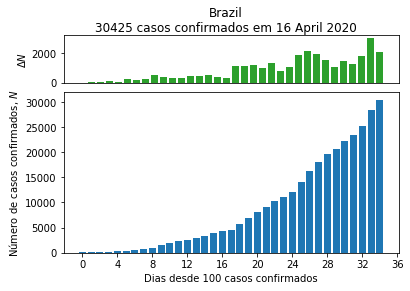

In [65]:
#escolha do país
country = 'Brazil'

plot_graf(country)
plt.show()


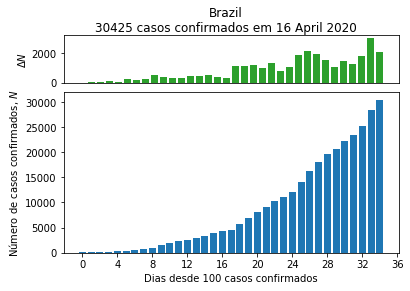

In [57]:
countries = ['Italy', 'Spain']
make_comparison_plot(countries, normalize=False)
plt.show()

AttributeError: 'NoneType' object has no attribute 'plot'

<Figure size 432x288 with 0 Axes>